<a href="https://colab.research.google.com/github/UserLeeIsTired/simpleModel/blob/main/Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Model

In [18]:
import pandas as pd

data = pd.read_excel('/data.xlsx')

# filter out row with any column with NaN
data = data.dropna()

data = data.drop('Form\nFactor', axis=1)

data

,Battery,Capacity Net New,Chemistry,Age (Months),Odometer(),Rated Range,Capacity Net Now (),Cycles,Degradation,WarrantyTime,WarrantyMileage,WarrantyDegradation,Result vs fleet data,0.52,0.48,SUM
0,Panasonic 3L MIC,82.0,NCA MIC,17.1,20500,455,72.1,73.0,0.121,0.18,0.11,0.40,-0.068,0.0317,0.0203,0.0521
1,CATL 6C,55.9,LFP,20.9,22521,409,52.4,95.0,0.063,0.22,0.14,0.21,-0.017,0.0308,0.0155,0.0463
2,CATL 6L,61.7,LFP,16.9,26504,416,57.4,99.0,0.070,0.18,0.17,0.23,-0.028,0.0244,0.0174,0.0418
3,LG Chem 5L,79.5,NCM,19.6,32680,558,76.4,101.0,0.038,0.20,0.17,0.13,0.004,0.0257,0.0168,0.0426
4,Panasonic 3L MIC,82.0,NCA MIC,16.0,20000,487,77.2,69.0,0.059,0.17,0.10,0.20,-0.009,0.0297,0.0198,0.0495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,LG Chem 5L,79.5,NCM,39.0,80013,496,72.2,290.0,0.092,0.41,0.42,0.31,0.000,0.0511,0.0412,0.0923
2886,CATL 6L,61.7,LFP,24.0,32949,421,58.1,123.0,0.058,0.25,0.21,0.19,-0.002,0.0348,0.0217,0.0564
2887,LG Chem 5L,79.5,NCM,19.5,43923,516,73.8,128.0,0.072,0.20,0.23,0.24,-0.024,0.0255,0.0226,0.0481
2888,CATL 6L,61.7,LFP,17.9,39523,412,58.5,150.0,0.052,0.19,0.25,0.17,0.000,0.0258,0.0260,0.0518


Unique name for battery column and chemisty column

In [19]:
battery_unique = data.Battery.unique()
chemistry_unique = data.Chemistry.unique()

print(battery_unique)
print(chemistry_unique)

['Panasonic 3L MIC' 'CATL 6C' 'CATL 6L' 'LG Chem 5L' 'LG Chem 5C'
 'Panasonic 3' 'Panasonic 1C' 'Panasonic 1L' 'Panasonic 3L' 'Panasonic 3C'
 'Panasonic A3']
['NCA MIC' 'LFP' 'NCM' 'NCA']


Apply one hot and merge the table

In [20]:
import sklearn
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
ohe_transform = ohe.fit_transform(data[['Battery', 'Chemistry']])

data = pd.concat([data.drop(['Battery', 'Chemistry'], axis=1), ohe_transform], axis=1)

data


,Capacity Net New,Age (Months),Odometer(),Rated Range,Capacity Net Now (),Cycles,Degradation,WarrantyTime,WarrantyMileage,WarrantyDegradation,...,Battery_Panasonic 1L,Battery_Panasonic 3,Battery_Panasonic 3C,Battery_Panasonic 3L,Battery_Panasonic 3L MIC,Battery_Panasonic A3,Chemistry_LFP,Chemistry_NCA,Chemistry_NCA MIC,Chemistry_NCM
0,82.0,17.1,20500,455,72.1,73.0,0.121,0.18,0.11,0.40,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,55.9,20.9,22521,409,52.4,95.0,0.063,0.22,0.14,0.21,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,61.7,16.9,26504,416,57.4,99.0,0.070,0.18,0.17,0.23,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,79.5,19.6,32680,558,76.4,101.0,0.038,0.20,0.17,0.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,82.0,16.0,20000,487,77.2,69.0,0.059,0.17,0.10,0.20,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,79.5,39.0,80013,496,72.2,290.0,0.092,0.41,0.42,0.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2886,61.7,24.0,32949,421,58.1,123.0,0.058,0.25,0.21,0.19,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2887,79.5,19.5,43923,516,73.8,128.0,0.072,0.20,0.23,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2888,61.7,17.9,39523,412,58.5,150.0,0.052,0.19,0.25,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


separate the degradation (y output)

In [21]:
y = data['Degradation']
data = data.drop('Degradation', axis=1)

Normalize data

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data.columns = data.columns.astype(str)
data = scaler.fit_transform(data)

split test set and validation set

In [23]:
from sklearn.model_selection import train_test_split

# 70% of data will be used to train thhe model
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=1)

Apply linear regression model

In [24]:
from sklearn.linear_model import LinearRegression

lin_r = LinearRegression()
lin_r.fit(X_train, y_train)

LinearRegression()

predict the result

In [25]:
y_pred = lin_r.predict(X_test)

Visualize the result

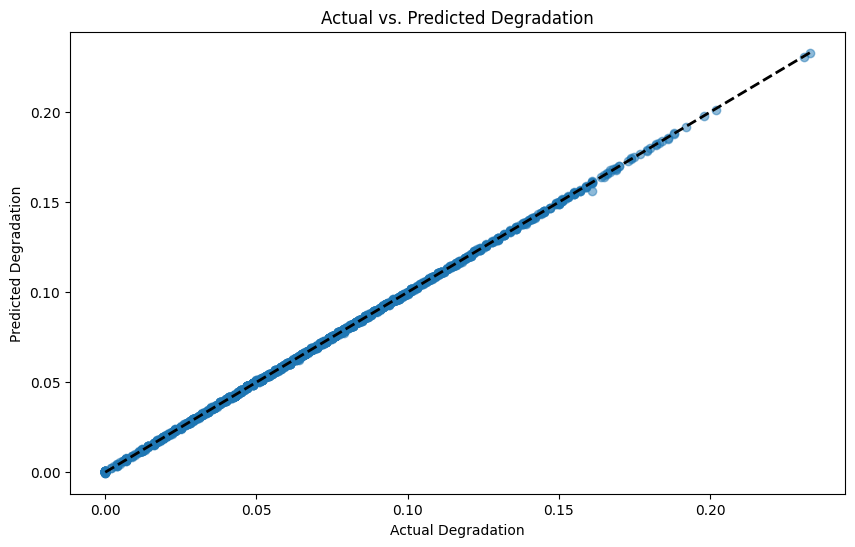

Mean Squared Error: 1.6012581289267457e-07


In [27]:

import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Degradation")
plt.ylabel("Predicted Degradation")
plt.title("Actual vs. Predicted Degradation")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")